In [31]:
# !pip install pdf2image
# !apt-get install poppler-utils
# !pip install fuzzywuzzy
# !python -m pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install paddleocr==2.7.3
# !python3 -m pip install paddlepaddle==2.6.1 -i https://mirror.baidu.com/pypi/simple

In [ ]:
# !unzip Testing.zip

In [2]:
import numpy as np

from paddleocr import PaddleOCR

In [3]:
def paddle_to_easy(result):
  results = []
  for r in result[0]:
    temp = []
    temp.append(r[0])
    temp.append(r[1][0])
    temp.append(r[1][1])
    results.append(temp)
  return results

In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [5]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=False, lang='en')

[2024/05/02 01:37:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

In [47]:
img_path = "test1.jpg"
result = ocr.ocr(img_path, cls=True)
results = paddle_to_easy(result)
results

[2024/05/02 01:42:50] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/05/02 01:42:50] ppocr DEBUG: dt_boxes num : 97, elapsed : 0.2194509506225586
[2024/05/02 01:43:05] ppocr DEBUG: rec_res num  : 97, elapsed : 15.015361785888672


[[[[349.0, 22.0], [418.0, 22.0], [418.0, 33.0], [349.0, 33.0]],
  '25/25317/K404941',
  0.9976911544799805],
 [[[36.0, 38.0], [148.0, 38.0], [148.0, 52.0], [36.0, 52.0]],
  'SI.No.K404941',
  0.9764594435691833],
 [[[49.0, 67.0], [455.0, 68.0], [455.0, 89.0], [49.0, 88.0]],
  'Board of Intermediate Education,A.P.',
  0.9515954256057739],
 [[[125.0, 90.0], [372.0, 90.0], [372.0, 103.0], [125.0, 103.0]],
  'Vidya Bhavan,Nampally, Hyderabad-500 001',
  0.9186035394668579],
 [[[398.0, 179.0], [425.0, 179.0], [425.0, 190.0], [398.0, 190.0]],
  '1480173',
  0.9844463467597961],
 [[[206.0, 200.0], [296.0, 200.0], [296.0, 210.0], [206.0, 210.0]],
  'INTERMEDIATE',
  0.9974563121795654],
 [[[105.0, 212.0], [397.0, 212.0], [397.0, 225.0], [105.0, 225.0]],
  'PASS CERTIFICATE CUM MEMORANDUM OF MARKS',
  0.9496542811393738],
 [[[59.0, 239.0], [342.0, 235.0], [343.0, 249.0], [59.0, 252.0]],
  'This is to Certify that BOMMAREDDY DHITENDRA REDDY',
  0.9334510564804077],
 [[[424.0, 239.0], [443.0, 239

In [48]:
def preprocess_text_objects(results):
  filtered = results
  transformed = []
  merged = []

  for obj in filtered:
    center_x = sum([i[0] for i in obj[0]])//4
    center_y = sum([i[1] for i in obj[0]])//4
    height = max([abs(obj[0][0][1]-i[1]) for i in obj[0]])
    width = max([abs(obj[0][0][0]-i[0]) for i in obj[0]])
    transformed.append([[center_x,center_y,height,width],obj[1]])

  return transformed

preprocessed = preprocess_text_objects(results)
print(preprocessed)

[[[383.0, 27.0, 11.0, 69.0], '25/25317/K404941'], [[92.0, 45.0, 14.0, 112.0], 'SI.No.K404941'], [[252.0, 78.0, 22.0, 406.0], 'Board of Intermediate Education,A.P.'], [[248.0, 96.0, 13.0, 247.0], 'Vidya Bhavan,Nampally, Hyderabad-500 001'], [[411.0, 184.0, 11.0, 27.0], '1480173'], [[251.0, 205.0, 10.0, 90.0], 'INTERMEDIATE'], [[251.0, 218.0, 13.0, 292.0], 'PASS CERTIFICATE CUM MEMORANDUM OF MARKS'], [[200.0, 243.0, 13.0, 284.0], 'This is to Certify that BOMMAREDDY DHITENDRA REDDY'], [[433.0, 244.0, 11.0, 19.0], 'son'], [[65.0, 264.0, 9.0, 11.0], 'of'], [[171.0, 260.0, 13.0, 144.0], 'BOMMAREDDY RAMIREDDY'], [[420.0, 263.0, 15.0, 38.0], 'bearing'], [[94.0, 282.0, 10.0, 69.0], 'Registered Mo.'], [[173.0, 278.0, 11.0, 58.0], '1125226307'], [[343.0, 281.0, 13.0, 191.0], 'has appeared at the Intermediate Public'], [[107.0, 299.0, 10.0, 97.0], 'Examination held in'], [[214.0, 295.0, 11.0, 66.0], 'MARCH-2011'], [[331.0, 298.0, 14.0, 130.0], 'and passed in A GRADE'], [[72.0, 317.0, 13.0, 27.0], 

In [49]:
def process_horizontal(results, size=1600):
  y = size/90
  horizontal=[]
  i=0

  unique_results = []
  seen_rectangles = []
  for rectangle, text in results:
      rectangle_key = tuple(rectangle)
      if rectangle_key not in seen_rectangles:
          unique_results.append([rectangle, text])
          seen_rectangles.append(rectangle_key)
  results = unique_results
  results=sorted(results, key=lambda x: (x[0][1], x[0][0]))

  while i<len(results):
    result=results[i]
    temp=[]
    k=0
    for j in results[i:]:
      if abs(result[0][1]-j[0][1])<=y:
        temp.append(j)
        k+=1
    i+=k
    temp=sorted(temp, key=lambda x:x[0])
    horizontal.append(temp)
  return horizontal

preprocessed_x = process_horizontal(preprocessed)
preprocessed_x[14]

[[[60.0, 416.0, 11.0, 35.0], 'Fart-2:'],
 [[149.0, 414.0, 14.0, 52.0], 'SANSKRIT'],
 [[311.0, 417.0, 12.0, 19.0], '100'],
 [[351.0, 417.0, 12.0, 19.0], '083'],
 [[396.0, 417.0, 12.0, 18.0], '100'],
 [[435.0, 417.0, 12.0, 19.0], '088']]

In [50]:
# !pip install fuzzywuzzy

import re
from fuzzywuzzy import fuzz

def find_text_bounding_box(data, target_words):
    bounding_boxes = []

    for item in data:
        text = item[1]
        bbox = item[0]
        text_lower = text.lower()

        for target_word in target_words:
            regex_pattern = re.compile(rf"\b\w{{0,{len(target_word)+1}}}{re.escape(target_word)}\w{{0,{len(target_word)+1}}}\b", re.IGNORECASE)
            if regex_pattern.search(text_lower):
                bounding_boxes.append([bbox, text])
                break
            if len(target_word) - 1 <= len(text_lower) <= len(target_word) + 1:
                if fuzz.partial_ratio(target_word, text_lower) > 85:
                    bounding_boxes.append([bbox, text])
                    break

    return bounding_boxes

target_words = ["course","title","grade","subject","credits","result","marks", "code", "total", "internal",'s.no']
header_boxes = find_text_bounding_box(preprocessed, target_words)

header_boxes

[[[251.0, 218.0, 13.0, 292.0], 'PASS CERTIFICATE CUM MEMORANDUM OF MARKS'],
 [[331.0, 298.0, 14.0, 130.0], 'and passed in A GRADE'],
 [[93.0, 343.0, 10.0, 107.0], 'The subjects in which'],
 [[310.0, 344.0, 10.0, 254.0],
  'was examined and the marks awarded are as follows'],
 [[163.0, 366.0, 11.0, 39.0], 'Subject'],
 [[351.0, 367.0, 11.0, 28.0], 'Marks'],
 [[438.0, 367.0, 11.0, 27.0], 'Marks'],
 [[309.0, 377.0, 11.0, 28.0], 'Marks'],
 [[395.0, 377.0, 11.0, 28.0], 'Marks'],
 [[79.0, 443.0, 11.0, 72.0], 'Optional Subjects'],
 [[67.0, 621.0, 12.0, 51.0], 'Total Marks']]

In [51]:
from statistics import mode, mean

def search_headers(results, headers):
  idx_list = []
  for header in headers:
    for i in range(len(results)):
      result = results[i]
      lst = [res[1] for res in result]
      if header[1] in lst:
        idx_list.append(i)
  idx = mode(idx_list)
  return idx,results[idx]

search_headers(preprocessed_x, header_boxes)

(12,
 [[[163.0, 366.0, 11.0, 39.0], 'Subject'],
  [[309.0, 367.0, 10.0, 41.0], 'Maximum'],
  [[309.0, 377.0, 11.0, 28.0], 'Marks'],
  [[351.0, 367.0, 11.0, 28.0], 'Marks'],
  [[352.0, 377.0, 11.0, 35.0], 'Secured'],
  [[395.0, 377.0, 11.0, 28.0], 'Marks'],
  [[396.0, 367.0, 11.0, 40.0], 'Maximum'],
  [[438.0, 367.0, 11.0, 27.0], 'Marks'],
  [[440.0, 378.0, 11.0, 36.0], 'Secured']])

In [52]:
def is_overlapping(rect1, rect2):
    rect1_left = rect1[0] - rect1[3] / 2
    rect1_right = rect1[0] + rect1[3] / 2
    rect2_left = rect2[0] - rect2[3] / 2
    rect2_right = rect2[0] + rect2[3] / 2

    if rect1_left <= rect2_right and rect1_right >= rect2_left:
        return True, min(rect1_right-rect2_left,rect2_right-rect1_left)
    elif rect2_left <= rect1_right and rect2_right >= rect1_left:
        return True, min(rect1_right-rect2_left,rect2_right-rect1_left)
    elif rect1_left >= rect2_right and rect1_right >= rect2_left:
        return False, abs(rect2_right - rect1_left)
    elif rect2_left >= rect1_right and rect2_right >= rect1_left:
        return False, abs(rect1_right-rect2_left)
    else:
        return False, 1000


rect_1 = [100, 100, 25, 25]
rect_2 = [100, 100, 50, 50]

is_overlapping(rect_1, rect_2)

(True, 37.5)

In [53]:
import pandas as pd

def extract_df(preprocessed_x, probable_headers):
  idx, headers = search_headers(preprocessed_x, probable_headers)

  headers = sorted(headers, key=lambda x: x[0][0])
  counts = {}
  for sublist in headers:
      for i, element in enumerate(sublist):
          if isinstance(element, str):
              counts[element] = counts.get(element, 0) + 1
              if counts[element] > 1:
                  sublist[i] = f"{element}_{counts[element]}"


  header_names = [header[1] for header in headers]

  df = pd.DataFrame(columns=header_names)

  prev_y = mean([header[0][1] for header in headers])
  prev_dist = float('inf')

  analyze_text = preprocessed_x[idx+1:]

  data = []
  for text in analyze_text:
    y = mean([int(i[0][1]) for i in text])
    dist = y - prev_y
    if dist>=2*prev_dist:
      break
    temp = {}
    min_temp = {}
    assigned = []
    closest = {col[1]:[float("inf"), ""] for col in headers}
    for col in headers:
      for item in text:
        if is_overlapping(col[0],item[0])[0]:
          temp[col[1]]=item[1]
          closest[col[1]]=[0,item[1]]
          assigned.append(item[1])
          break
        if is_overlapping(col[0],item[0])[1]<closest[col[1]][0]:
          closest[col[1]]=[is_overlapping(col[0],item[0])[1],item[1]]

    min_values = {}
    for key, value in closest.items():
        if value[1] in min_values:
            if value[0] < min_values[value[1]][0]:
                min_values[value[1]] = (value[0], key)
        else:
            min_values[value[1]] = (value[0], key)
    closest = {min_key: closest[min_key] for _, min_key in min_values.values()}

    for key in closest.keys():
      if closest[key][1] not in assigned:
        temp[key]=closest[key][1]



    data.append(temp)
    prev_y = y
    prev_dist = dist


  dfs = [pd.DataFrame([row_data], columns=header_names) for row_data in data]
  df = pd.concat(dfs, ignore_index=True)

  return df

# extract_df(preprocessed_x, header_boxes)

In [54]:
from PIL import Image, ImageDraw

image = Image.open(img_path)

def draw_boxes(image, results):
    draw = ImageDraw.Draw(image)
    for result in results:
        x_center, y_center, height, width = result[0]
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2
        draw.rectangle([x_min, y_min, x_max, y_max], outline=(0, 255, 0), width=2)
    return image


filtered = [obj for obj in results if obj[2] >= 0.5]

In [55]:
def format_text_to_dataframe(results, target_words, size):
  preprocessed = preprocess_text_objects(results)

  preprocessed_x = process_horizontal(preprocessed, size)
  header_boxes=find_text_bounding_box(preprocessed, target_words)

  df = extract_df(preprocessed_x, header_boxes)
  return df

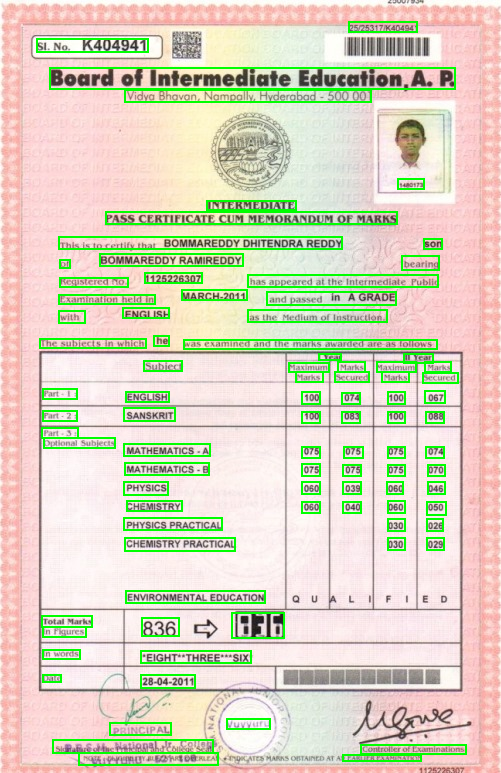

In [56]:
draw_boxes(image, preprocess_text_objects(results))

In [57]:
def header_overlap(header_boxes, results, tolerence=10):
  overlaps = []
  for header in header_boxes:
    overlaps.append([header])

    for result in results:
      header_t = header[0][1]-(header[0][2]/2)
      header_b = header[0][1]+(header[0][2]/2)
      result_t = result[0][1]-(result[0][2]/2)
      result_b = result[0][1]+(result[0][2]/2)
      if header_t-result_b<tolerence and result_t<header_b and is_overlapping(header[0],result[0])[0] and is_overlapping(header[0],result[0])[1]>20 and result!=header:
        overlaps[-1].append(result)
      elif header_t<result_b and result_t-header_b<tolerence and is_overlapping(header[0],result[0])[0] and is_overlapping(header[0],result[0])[1]>20 and result!=header:
        overlaps[-1].append(result)

  print(overlaps)
  processed_headers = []
  for overlap in overlaps:
    min_x = float('inf')
    max_x = float('-inf')
    min_y = float('inf')
    max_y = float('-inf')

    text = ""
    for rect, txt in overlap:
        center_x, center_y, height, width = rect
        x1 = center_x - width/2
        x2 = center_x + width/2
        y1 = center_y - height/2
        y2 = center_y + height/2

        min_x = min(min_x, x1)
        max_x = max(max_x, x2)
        min_y = min(min_y, y1)
        max_y = max(max_y, y2)

        text = text+" "+txt

    bounding_rect = [(min_x+max_x)/2, (min_y+max_y)/2, max_y - min_y, max_x - min_x]
    processed_headers.append([bounding_rect, text])

  seen_first_elements = []
  final_headers = []
  for sublist in processed_headers:
      first_element = sublist[0]
      if first_element not in seen_first_elements:
          final_headers.append(sublist)
          seen_first_elements.append(first_element)
  sorted_headers = sorted(final_headers, key=lambda x: x[0][0])
  return sorted_headers

headers = header_overlap(search_headers(preprocessed_x,header_boxes)[1], preprocessed, image.size[1]/250)

[[[[163.0, 366.0, 11.0, 39.0], 'Subject']], [[[309.0, 367.0, 10.0, 41.0], 'Maximum'], [[309.0, 377.0, 11.0, 28.0], 'Marks']], [[[309.0, 377.0, 11.0, 28.0], 'Marks'], [[309.0, 367.0, 10.0, 41.0], 'Maximum']], [[[351.0, 367.0, 11.0, 28.0], 'Marks'], [[352.0, 377.0, 11.0, 35.0], 'Secured']], [[[352.0, 377.0, 11.0, 35.0], 'Secured'], [[351.0, 367.0, 11.0, 28.0], 'Marks']], [[[395.0, 377.0, 11.0, 28.0], 'Marks'], [[396.0, 367.0, 11.0, 40.0], 'Maximum']], [[[396.0, 367.0, 11.0, 40.0], 'Maximum'], [[395.0, 377.0, 11.0, 28.0], 'Marks']], [[[438.0, 367.0, 11.0, 27.0], 'Marks'], [[440.0, 378.0, 11.0, 36.0], 'Secured']], [[[440.0, 378.0, 11.0, 36.0], 'Secured'], [[438.0, 367.0, 11.0, 27.0], 'Marks']]]


In [58]:
def process_results(results, headers):
  def is_inside(rect1, rect2):
      x1, y1, h1, w1 = rect1
      x2, y2, h2, w2 = rect2
      return x1-(w1/2) >= x2-(w2/2) and y1-(h1/2) >= y2-(h2/2) and x1 + (w1/2) <= x2 + (w2/2) and y1 + (h1/2) <= y2 + (h2/2)

  final_results = []

  for result_rect, result_text in results:
      is_inside_header = False
      for header_rect, header_text in headers:
          if is_inside(result_rect, header_rect):
              final_results.append([header_rect, header_text])
              is_inside_header = True
              break
      if not is_inside_header:
          final_results.append([result_rect, result_text])
  return final_results

processed_results = process_results(preprocessed, headers)

In [59]:
preprocessed_x = process_horizontal(processed_results)

headers = search_headers(preprocessed_x, headers)

In [60]:
headers

(12,
 [[[163.0, 366.0, 11.0, 39.0], ' Subject'],
  [[309.0, 372.25, 20.5, 41.0], ' Maximum Marks'],
  [[352.0, 372.0, 21.0, 35.0], ' Marks Secured'],
  [[396.0, 372.0, 21.0, 40.0], ' Marks Maximum'],
  [[440.0, 372.5, 22.0, 36.0], ' Marks Secured']])

In [61]:
df = extract_df(preprocessed_x, headers[1])

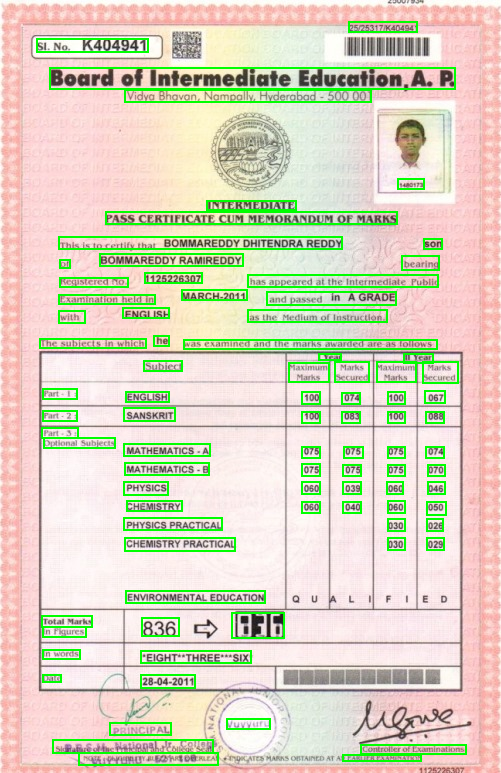

In [62]:
image = Image.open(img_path)
draw_boxes(image, processed_results)

In [63]:
def process_df(df):
  
    columns = list(df.columns)
    relations = []
    for i in range(len(columns)-1):
        test_cols = columns[i+1:]
        ref=columns[i]
        print(len(df[ref]))
        print(test_cols)
        for test in test_cols:
            print(len(df[test]))
            relationship_exists = all((df[ref] == df[test]) | (df[[ref, test]].isnull().any(axis=1)))
            # relationship_exists = all((df[ref].reset_index(drop=True) == df[test].reset_index(drop=True)) | (df[[ref, test]].isnull().any(axis=1)))
            if relationship_exists:
                relations.append([ref,test])

    drop_cols=set()
    for relation in relations:
      name = ' '.join(relation)
      df[name] = df.apply(lambda row: row[relation[0]] if row[relation[0]] == row[relation[1]] else row[relation[0]] + row[relation[1]] if pd.notnull(row[relation[0]]) and pd.notnull(row[relation[1]]) else row[relation[0]] if pd.notnull(row[relation[0]]) else row[relation[1]], axis=1)
      i = min(columns.index(relation[0]), columns.index(relation[1]))
      columns.insert(i, name)
      df = df[columns]
      drop_cols.update(relation)
    df.drop(list(drop_cols), axis=1, inplace=True)
    return df

In [64]:
df

,Subject,Maximum Marks,Marks Secured,Marks Maximum,Marks Secured_2
0,ENGLISH,100,074,100,067
1,SANSKRIT,100,083,100,088
2,MATHEMATICS-A,NaN,NaN,NaN,NaN
3,MATHEMATICS-B,075,075,075,074
4,NaN,075,075,075,070
5,PHYSICS,060,039,060,046
6,CHEMISTRY,060,040,060,050
7,PHYSICS PRACTICAL,NaN,NaN,030,026
8,CHEMISTRY PRACTICAL,NaN,NaN,030,029


In [65]:
process_df(df)

9
[' Maximum Marks', ' Marks Secured', ' Marks Maximum', ' Marks Secured_2']
9
9
9
9
9
[' Marks Secured', ' Marks Maximum', ' Marks Secured_2']
9
9
9
9
[' Marks Maximum', ' Marks Secured_2']
9
9
9
[' Marks Secured_2']
9


,Subject,Maximum Marks Marks Maximum,Marks Secured,Marks Secured_2
0,ENGLISH,100,074,067
1,SANSKRIT,100,083,088
2,MATHEMATICS-A,NaN,NaN,NaN
3,MATHEMATICS-B,075,075,074
4,NaN,075,075,070
5,PHYSICS,060,039,046
6,CHEMISTRY,060,040,050
7,PHYSICS PRACTICAL,030,NaN,026
8,CHEMISTRY PRACTICAL,030,NaN,029


In [52]:
df = process_df(df)
df

,Subject,Maximum Marks,Marks Secured,Marks Maximum,Marks Secured
0,ENGLISH,100,067,100,067
1,SANSKRIT,100,088,100,088
2,MATHEMATICS-A,NaN,NaN,NaN,NaN
3,MATHEMATICS-B,075,074,075,074
4,NaN,075,070,075,070
5,PHYSICS,060,046,060,046
6,CHEMISTRY,060,050,060,050
7,PHYSICS PRACTICAL,NaN,026,030,026
8,CHEMISTRY PRACTICAL,NaN,029,030,029


In [35]:
def find_target_box(data, target_words, non_target_words=[]):
    bounding_boxes = []

    for item in data:
        text = item[1]
        bbox = item[0]
        text_lower = text.lower()

        non_target_present = any(re.search(rf"\b{re.escape(word)}\b", text_lower) for word in non_target_words)
        if non_target_present:
            continue
        for target_word in target_words:
            regex_pattern = re.compile(rf"\b\w{{0,{len(target_word)+1}}}{re.escape(target_word)}\w{{0,{len(target_word)+1}}}\b", re.IGNORECASE)
            if regex_pattern.search(text_lower):
                bounding_boxes.append([bbox, text])
                break
            if len(target_word) - 1 <= len(text_lower) <= len(target_word) + 1:
                if fuzz.partial_ratio(target_word, text_lower) > 85:
                    bounding_boxes.append([bbox, text])
                    break
    return bounding_boxes

def find_next(horizontal, target):
    for line in horizontal:
        if target in line:
            return line[line.index(target)+1]
    return ""

In [36]:
def get_fields(preprocessed_x, processed_results):

    target_name = ["name", "student", "candidate"]
    non_target_name = ["course","father","mother"]

    target_university = ['university',"college"]

    target_course = ['computer', 'mechanical','civil',"electronics", "electrical",'department',"artificial","intelligence","engineering"]
    non_target_course = ['institute','college','university']

    target_gpa=['cgpa','sgpa','gpa']
    non_target_gpa = []

    name_field = find_target_box(processed_results, target_name, non_target_name)[0]

    name = name_field[1]

    if len(name.split(" "))>4:
        name_list=name.split(" ")
        id = list([0])
        for target in target_name:
            i = name.find(target)
            if i>-1:
                id.append(i+len(target))
        name = name[max(id):]

    else:
        name = find_next(preprocessed_x,name_field)[1]

    university= find_target_box(processed_results, target_university)[0][1]

    branch= find_target_box(processed_results, target_course, non_target_course)[0][1]
    if ":" in branch:
        branch=branch[branch.index(":")+1:]

    gpa_fields = find_target_box(processed_results, target_gpa)
    gpa_fields = [txt for txt in gpa_fields if len(txt[1].split(" "))<3]
    gpas = {}
    for i in gpa_fields:
        gpas[i[1]] = find_next(preprocessed_x, i)[1]

    return name, university, branch, gpas


In [37]:
name, university, branch, gpas = get_fields(preprocessed_x, processed_results)
data = df.to_dict()

json_data = {
    "name":name,
    "university":university,
    "course":branch,
    "course table":data,
    "gpas":gpas
}

In [38]:
json_data

{'name': 'S PRAVEENA KUMARI',
 'university': 'JAWAHARLALNEHRUTECHNOLOGICAL UNIVERSITYHYDERABAD',
 'course': 'ELECTRICAL & ELECTRONICS ENGINEERING',
 'course table': {'S.No.': {0: '1',
   1: '2',
   2: '3',
   3: '4',
   4: '5',
   5: '6',
   6: '7',
   7: nan,
   8: '8'},
  ' SUBJECT CODE': {0: '53007',
   1: '53008',
   2: '53009',
   3: '53010',
   4: '53011',
   5: '53012',
   6: '53602',
   7: '53603',
   8: nan},
  'SUBJECT  TITLE': {0: 'MATHEMATICS-III',
   1: 'FLUID MECHANICS ANDHYDRAULIC MACHINERY',
   2: 'ELECTRONIC DEVICES & CIRCUITS',
   3: 'ELECTRICAL CIRCUITS',
   4: 'ELECTRO MAGNETIC FIELDS',
   5: 'ELECTRICAL MACHINES-I',
   6: 'FLID MECHANICS AND HYDRAULIC MACHINERY LAB',
   7: 'ELECTRONIC DEVICES &CIRCUITS LAB',
   8: nan},
  ' Internal Marks': {0: '24',
   1: '17',
   2: '24',
   3: '25',
   4: '24',
   5: '24',
   6: '18',
   7: '24',
   8: nan},
  ' End Exam': {0: '68',
   1: '51',
   2: '34',
   3: '54',
   4: '29',
   5: '54',
   6: '48',
   7: '48',
   8: nan},
 

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

from utils import TranscriptOCR

transcriptocr = TranscriptOCR()

[2024/04/21 22:42:18] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\bhanu/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_len

[2024/04/21 22:42:33] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/04/21 22:42:33] ppocr DEBUG: dt_boxes num : 75, elapsed : 0.2812154293060303
[2024/04/21 22:42:45] ppocr DEBUG: rec_res num  : 75, elapsed : 11.445902347564697


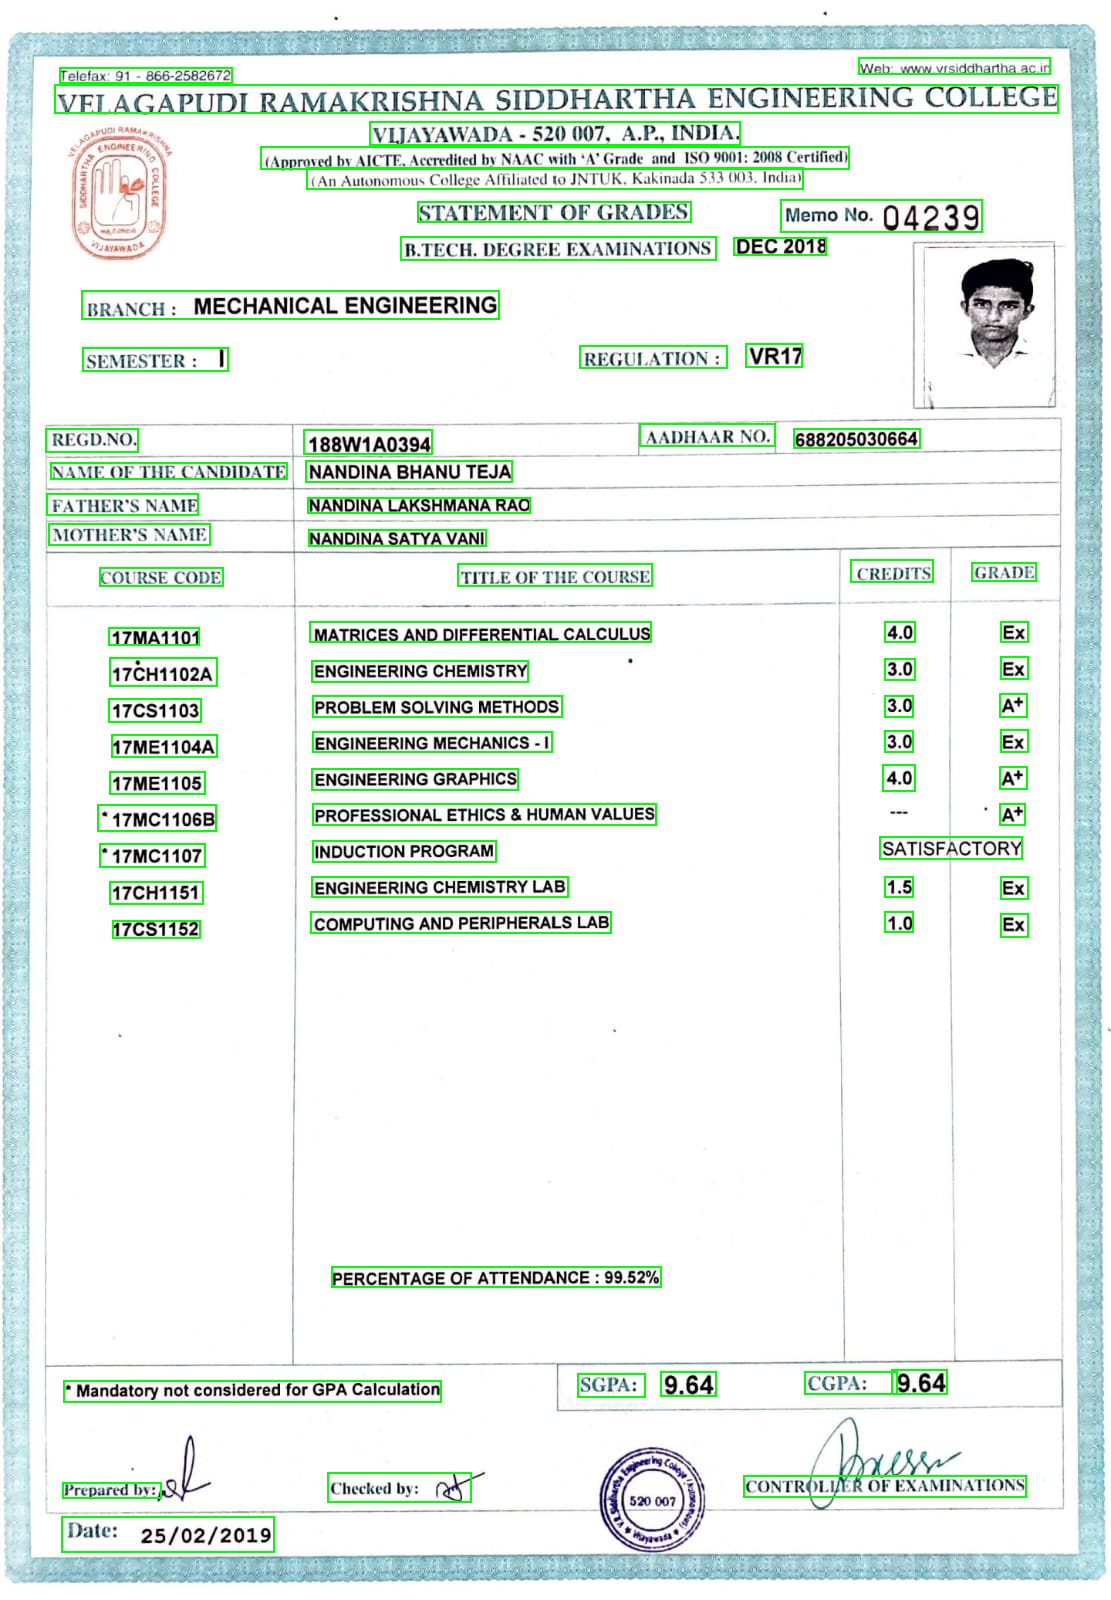

In [4]:
transcriptocr.draw_boxes('test.jpg')

In [3]:
transcriptocr.extract_json('test.jpg')

[2024/04/21 22:42:20] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process


[2024/04/21 22:42:21] ppocr DEBUG: dt_boxes num : 75, elapsed : 1.254380226135254
[2024/04/21 22:42:33] ppocr DEBUG: rec_res num  : 75, elapsed : 11.585350751876831


{'name': 'NANDINA BHANU TEJA',
 'university': 'VELAGAPUDI RAMAKRISHNA SIDDHARTHA ENGINEERING COLLEGE',
 'course': 'BRANCH:MECHANICAL ENGINEERING',
 'course table': {' COURSE CODE': {0: '17MA1101',
   1: '17CH1102A',
   2: '17CS1103',
   3: '17ME1104A',
   4: '17ME1105',
   5: '17MC1106B',
   6: '*17MC1107',
   7: '17CH1151',
   8: '17CS1152'},
  ' TITLE OF THE COURSE': {0: 'MATRICES AND DIFFERENTIAL CALCULUS',
   1: 'ENGINEERING CHEMISTRY',
   2: 'PROBLEM SOLVING METHODS',
   3: 'ENGINEERING MECHANICS-1',
   4: 'ENGINEERING GRAPHICS',
   5: 'PROFESSIONAL ETHICS & HUMAN VALUES',
   6: 'INDUCTION PROGRAME',
   7: 'ENGINEERING CHEMISTRY LAB',
   8: 'COMPUTING AND PERIPHERALS LAB'},
  ' CREDITS': {0: '4.0',
   1: '3.0',
   2: '3.0',
   3: '3.0',
   4: '4.0',
   5: nan,
   6: 'SATISFACTORY',
   7: '1.5',
   8: '1.0'},
  ' GRADE': {0: 'Ex',
   1: 'Ex',
   2: 'A+',
   3: 'Ex',
   4: 'A+',
   5: 'A+',
   6: 'SATISFACTORY',
   7: 'Ex',
   8: 'Ex'}},
 'gpas': {'SGPA:': '9.64', 'CGPA': '9.64'}}